In [22]:
import pandas as pd
import nltk

In [8]:
# Shorter version of the essays dataset for qual software
essays_sent = pd.read_csv('essays_sentiment.csv')
essays = pd.read_csv('essays.csv')
essays[:100][['ID', 'Preprocessed Text']].to_csv('essays100.csv', index=False)

In [49]:
# dataset for autotrain
essays_auto = essays[['ID', 'Essay Text']]
essays_auto['Sentiment'] = ''
essays_auto.to_csv('essays_auto.csv', index=False)

In [16]:
# Rename the ID column so that we merge the data on this variable
essays_sent.drop('Essay Length', axis=1, inplace=True)

In [17]:
essays_sent.rename(columns={'ID':'NCDSID'},inplace=True)
essays_sent.head()

,NCDSID,Essay Text,Preprocessed Text,Sentiment,Score
0,N28280Y,"I am happily married, we are grand-parents. Ou...","['happily', 'married', 'grandparent', 'two', '...",POSITIVE,0.998764
1,N13960Q,"I am retired, not living in London, probably i...","['retired', 'living', 'london', 'probably', 'n...",POSITIVE,0.953925
2,N23786Z,I imagine I'll still be teaching french at Pri...,"['imagine', 'ill', 'still', 'teaching', 'frenc...",POSITIVE,0.763161
3,N17606R,I am retired from work. I enjoy leisurely time...,"['retired', 'work', 'enjoy', 'leisurely', 'tim...",POSITIVE,0.998788
4,N19466F,"Retired and moved further away from London, Su...","['retired', 'moved', 'away', 'london', 'sussex...",POSITIVE,0.997543


In [7]:
# Read LeisureWellbeing data
LeisureWellbeing = pd.read_csv('LeisureWellbeing.csv')
LeisureWellbeing.head()

,NCDSID,ND8EXT,ND8AGR,ND8CON,ND8EMO,ND8INT,ND8WEMWB,ND8PHHE,ND8RLME,ND8ENFA,...,N8SCQ1D,N8SCQ1E,N8SCQ1F,N8SCQ1G,N8SCQ1H,N8SCQ1I,N8SCQ1J,N8SCQ1K,N8SCQ1L,LeisureIndex
0,N10001N,30.0,44.0,44.0,31.0,38.0,61.0,100.0,100.00,95.0,...,NaN,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1.818182
1,N10002P,37.0,27.0,37.0,32.0,34.0,55.0,100.0,100.00,70.0,...,3.0,2.0,2.0,1.0,1.0,3.0,5.0,5.0,1.0,2.636364
2,N10007U,34.0,41.0,33.0,41.0,37.0,65.0,100.0,100.00,95.0,...,3.0,2.0,2.0,1.0,1.0,1.0,5.0,5.0,1.0,2.500000
3,N10008V,21.0,40.0,35.0,24.0,30.0,63.0,100.0,66.67,70.0,...,NaN,NaN,2.0,1.0,3.0,5.0,1.0,1.0,1.0,2.200000
4,N10009W,32.0,44.0,37.0,43.0,36.0,55.0,100.0,100.00,80.0,...,NaN,NaN,NaN,2.0,1.0,5.0,3.0,5.0,3.0,3.000000


In [101]:
# Merge LeisureWellbeing and Essays dataframes
main = pd.merge(essays_sent, LeisureWellbeing, on='NCDSID',how='inner')
main.drop(["Sentiment", "Score"], axis=1, inplace=True)
main.head()

,NCDSID,Essay Text,Preprocessed Text,ND8EXT,ND8AGR,ND8CON,ND8EMO,ND8INT,ND8WEMWB,ND8PHHE,...,N8SCQ1D,N8SCQ1E,N8SCQ1F,N8SCQ1G,N8SCQ1H,N8SCQ1I,N8SCQ1J,N8SCQ1K,N8SCQ1L,LeisureIndex
0,N28280Y,"I am happily married, we are grand-parents. Ou...","['happily', 'married', 'grandparent', 'two', '...",44.0,45.0,41.0,26.0,37.0,58.0,95.0,...,NaN,2.0,2.0,2.0,NaN,5.0,5.0,5.0,3.0,3.300000
1,N13960Q,"I am retired, not living in London, probably i...","['retired', 'living', 'london', 'probably', 'n...",26.0,25.0,25.0,23.0,32.0,40.0,90.0,...,NaN,3.0,3.0,5.0,3.0,5.0,5.0,5.0,3.0,4.000000
2,N23786Z,I imagine I'll still be teaching french at Pri...,"['imagine', 'ill', 'still', 'teaching', 'frenc...",36.0,44.0,42.0,30.0,32.0,59.0,85.0,...,5.0,3.0,5.0,NaN,5.0,1.0,1.0,1.0,2.0,3.090909
3,N17606R,I am retired from work. I enjoy leisurely time...,"['retired', 'work', 'enjoy', 'leisurely', 'tim...",22.0,41.0,29.0,38.0,26.0,54.0,100.0,...,NaN,2.0,2.0,1.0,5.0,5.0,2.0,5.0,2.0,3.181818
4,N19466F,"Retired and moved further away from London, Su...","['retired', 'moved', 'away', 'london', 'sussex...",31.0,40.0,32.0,30.0,34.0,51.0,85.0,...,NaN,2.0,3.0,NaN,5.0,1.0,5.0,5.0,2.0,3.300000


### Sentiment Analysis with NLTK Vader

Here we try SentimentIntenzityAnalyser from Vader to conduct sentiment analysis with a continuous scale. Advantages are that it's easy to deploy, fast to run but accuracy lags behind the state-of-the-art LLMs available at Hugging Face. 

A problem are mainly false negatives - to fix this, we categorize sentiment with high threshold values which classifies as positive/negative only the values with high absolute value of continuous sentiments. Most essays seem to have a relatively neutral tone anyway.

In [24]:
# Import necessary libraries and dependencies to do continuous sentiment analysis 
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ninabucekova/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
# Set up sentiment analyser and calculate sentiment scores
sent_i = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent_i.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
main['Sentiment Continuous'] = main['Essay Text'].apply(vadar_sentiment)

In [42]:
# Accuracy not that good (lot of false negatives) but continuous scale desirable and fast to run
main.head(10)

,NCDSID,Essay Text,Preprocessed Text,ND8EXT,ND8AGR,ND8CON,ND8EMO,ND8INT,ND8WEMWB,ND8PHHE,...,N8SCQ1E,N8SCQ1F,N8SCQ1G,N8SCQ1H,N8SCQ1I,N8SCQ1J,N8SCQ1K,N8SCQ1L,LeisureIndex,Sentiment Continuous
0,N28280Y,"I am happily married, we are grand-parents. Ou...","['happily', 'married', 'grandparent', 'two', '...",44.0,45.0,41.0,26.0,37.0,58.0,95.0,...,2.0,2.0,2.0,NaN,5.0,5.0,5.0,3.0,3.300000,0.9542
1,N13960Q,"I am retired, not living in London, probably i...","['retired', 'living', 'london', 'probably', 'n...",26.0,25.0,25.0,23.0,32.0,40.0,90.0,...,3.0,3.0,5.0,3.0,5.0,5.0,5.0,3.0,4.000000,-0.7001
2,N23786Z,I imagine I'll still be teaching french at Pri...,"['imagine', 'ill', 'still', 'teaching', 'frenc...",36.0,44.0,42.0,30.0,32.0,59.0,85.0,...,3.0,5.0,NaN,5.0,1.0,1.0,1.0,2.0,3.090909,0.7345
3,N17606R,I am retired from work. I enjoy leisurely time...,"['retired', 'work', 'enjoy', 'leisurely', 'tim...",22.0,41.0,29.0,38.0,26.0,54.0,100.0,...,2.0,2.0,1.0,5.0,5.0,2.0,5.0,2.0,3.181818,0.9432
4,N19466F,"Retired and moved further away from London, Su...","['retired', 'moved', 'away', 'london', 'sussex...",31.0,40.0,32.0,30.0,34.0,51.0,85.0,...,2.0,3.0,NaN,5.0,1.0,5.0,5.0,2.0,3.300000,-0.7615
5,N23362D,"Regular exercise - Running, SWIMMing, WAlking ...","['regular', 'exercise', 'running', 'swimming',...",24.0,34.0,33.0,34.0,34.0,50.0,100.0,...,3.0,3.0,1.0,2.0,5.0,5.0,1.0,3.0,2.700000,0.5473
6,N12838K,Retired from Teaching Trampolining Married 'at...,"['retired', 'teaching', 'trampolining', 'marri...",22.0,40.0,39.0,33.0,34.0,56.0,85.0,...,2.0,5.0,2.0,2.0,5.0,5.0,5.0,1.0,3.454545,0.9639
7,N12868R,CHILDREN AWAY AT COLLEGE SOCIALISING WITH FRIE...,"['child', 'away', 'college', 'socialising', 'f...",33.0,36.0,38.0,20.0,38.0,34.0,100.0,...,2.0,2.0,1.0,2.0,5.0,5.0,5.0,2.0,3.100000,0.7184
8,N26627X,I will be happily co-habiting and living a sem...,"['happily', 'cohabiting', 'living', 'semicount...",31.0,41.0,30.0,26.0,37.0,47.0,70.0,...,2.0,NaN,3.0,5.0,3.0,NaN,3.0,1.0,2.900000,0.9948
9,N10695E,I imagine when I am 60 years old my life may n...,"['imagine', '60', 'year', 'old', 'life', 'may'...",15.0,40.0,37.0,27.0,26.0,50.0,95.0,...,2.0,2.0,1.0,NaN,5.0,5.0,5.0,2.0,3.111111,0.9294


In [43]:
# Sentiment analysis with DistilBERT, a lighter and faster version of BERT

# Libraries necessary for running Hugging face language models
import torch
import transformers

from transformers import pipeline

In [44]:
# Set up sentiment analysis pipeline with a model of choice
sentiment_classifier = pipeline('sentiment-analysis', 
                                model="distilbert-base-uncased")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.we

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [53]:
# Perform sentiment analysis on the column with the essays
results = sentiment_classifier(main['Essay Text'][:1000].tolist())

In [54]:
main['Sentiment'] = ''

In [55]:
# Add the sentiment analysis results into our dataset (batch 00)
sentiments = [result['label'] for result in results]

# Fill in the results columns with sentiment and confidence score
main.loc[:999, 'Sentiment'] = sentiments

In [57]:
main.head(10)

,NCDSID,Essay Text,Preprocessed Text,ND8EXT,ND8AGR,ND8CON,ND8EMO,ND8INT,ND8WEMWB,ND8PHHE,...,N8SCQ1F,N8SCQ1G,N8SCQ1H,N8SCQ1I,N8SCQ1J,N8SCQ1K,N8SCQ1L,LeisureIndex,Sentiment Continuous,Sentiment
0,N28280Y,"I am happily married, we are grand-parents. Ou...","['happily', 'married', 'grandparent', 'two', '...",44.0,45.0,41.0,26.0,37.0,58.0,95.0,...,2.0,2.0,NaN,5.0,5.0,5.0,3.0,3.300000,0.9542,LABEL_0
1,N13960Q,"I am retired, not living in London, probably i...","['retired', 'living', 'london', 'probably', 'n...",26.0,25.0,25.0,23.0,32.0,40.0,90.0,...,3.0,5.0,3.0,5.0,5.0,5.0,3.0,4.000000,-0.7001,LABEL_0
2,N23786Z,I imagine I'll still be teaching french at Pri...,"['imagine', 'ill', 'still', 'teaching', 'frenc...",36.0,44.0,42.0,30.0,32.0,59.0,85.0,...,5.0,NaN,5.0,1.0,1.0,1.0,2.0,3.090909,0.7345,LABEL_1
3,N17606R,I am retired from work. I enjoy leisurely time...,"['retired', 'work', 'enjoy', 'leisurely', 'tim...",22.0,41.0,29.0,38.0,26.0,54.0,100.0,...,2.0,1.0,5.0,5.0,2.0,5.0,2.0,3.181818,0.9432,LABEL_1
4,N19466F,"Retired and moved further away from London, Su...","['retired', 'moved', 'away', 'london', 'sussex...",31.0,40.0,32.0,30.0,34.0,51.0,85.0,...,3.0,NaN,5.0,1.0,5.0,5.0,2.0,3.300000,-0.7615,LABEL_1
5,N23362D,"Regular exercise - Running, SWIMMing, WAlking ...","['regular', 'exercise', 'running', 'swimming',...",24.0,34.0,33.0,34.0,34.0,50.0,100.0,...,3.0,1.0,2.0,5.0,5.0,1.0,3.0,2.700000,0.5473,LABEL_0
6,N12838K,Retired from Teaching Trampolining Married 'at...,"['retired', 'teaching', 'trampolining', 'marri...",22.0,40.0,39.0,33.0,34.0,56.0,85.0,...,5.0,2.0,2.0,5.0,5.0,5.0,1.0,3.454545,0.9639,LABEL_1
7,N12868R,CHILDREN AWAY AT COLLEGE SOCIALISING WITH FRIE...,"['child', 'away', 'college', 'socialising', 'f...",33.0,36.0,38.0,20.0,38.0,34.0,100.0,...,2.0,1.0,2.0,5.0,5.0,5.0,2.0,3.100000,0.7184,LABEL_1
8,N26627X,I will be happily co-habiting and living a sem...,"['happily', 'cohabiting', 'living', 'semicount...",31.0,41.0,30.0,26.0,37.0,47.0,70.0,...,NaN,3.0,5.0,3.0,NaN,3.0,1.0,2.900000,0.9948,LABEL_1
9,N10695E,I imagine when I am 60 years old my life may n...,"['imagine', '60', 'year', 'old', 'life', 'may'...",15.0,40.0,37.0,27.0,26.0,50.0,95.0,...,2.0,1.0,NaN,5.0,5.0,5.0,2.0,3.111111,0.9294,LABEL_0


In [58]:
# Emotion detection

# Set up emotion classification pipeline
emotion_classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=True)
# Light version of the ROBERTA model finetuned for emotion classification

/Users/ninabucekova/miniconda3/envs/nlpenv/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [59]:
# Perform emotion classification on the column with the essays
emotions = emotion_classifier(main['Essay Text'].tolist())

In [67]:
# Extract labels and scores from the outputs for all observations
emotion_output = []
for emotion in emotions:
    observation_emotions = {}
    for item in emotion:
        observation_emotions[item['label']] = item['score']
    emotion_output.append(observation_emotions)

# Create a DataFrame with emotion columns
emotion_data = pd.DataFrame(emotion_output)

# Concatenate the existing dataset with the emotion data
updated_main = pd.concat([main, emotion_data], axis=1)

# Print the updated data
to_drop = ['Anger', 'Disgust', 'Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
updated_main.drop(to_drop, axis=1, inplace=True)
updated_main.head()

,NCDSID,Essay Text,Preprocessed Text,ND8EXT,ND8AGR,ND8CON,ND8EMO,ND8INT,ND8WEMWB,ND8PHHE,...,LeisureIndex,Sentiment Continuous,Sentiment,anger,disgust,fear,joy,neutral,sadness,surprise
0,N28280Y,"I am happily married, we are grand-parents. Ou...","['happily', 'married', 'grandparent', 'two', '...",44.0,45.0,41.0,26.0,37.0,58.0,95.0,...,3.300000,0.9542,LABEL_0,0.001291,0.000894,0.000268,0.982044,0.004638,0.007959,0.002906
1,N13960Q,"I am retired, not living in London, probably i...","['retired', 'living', 'london', 'probably', 'n...",26.0,25.0,25.0,23.0,32.0,40.0,90.0,...,4.000000,-0.7001,LABEL_0,0.004131,0.001903,0.004476,0.009218,0.007038,0.972608,0.000626
2,N23786Z,I imagine I'll still be teaching french at Pri...,"['imagine', 'ill', 'still', 'teaching', 'frenc...",36.0,44.0,42.0,30.0,32.0,59.0,85.0,...,3.090909,0.7345,LABEL_1,0.024202,0.011763,0.140934,0.312525,0.410469,0.064782,0.035325
3,N17606R,I am retired from work. I enjoy leisurely time...,"['retired', 'work', 'enjoy', 'leisurely', 'tim...",22.0,41.0,29.0,38.0,26.0,54.0,100.0,...,3.181818,0.9432,LABEL_1,0.001595,0.001737,0.000340,0.974898,0.003598,0.016691,0.001141
4,N19466F,"Retired and moved further away from London, Su...","['retired', 'moved', 'away', 'london', 'sussex...",31.0,40.0,32.0,30.0,34.0,51.0,85.0,...,3.300000,-0.7615,LABEL_1,0.001112,0.001434,0.001872,0.014851,0.005902,0.973415,0.001414


In [77]:
# Recode leisure variables
leisure_vars = ['N8SCQ1A', 'N8SCQ1B', 'N8SCQ1C', 'N8SCQ1D', 'N8SCQ1E',
       'N8SCQ1F', 'N8SCQ1G', 'N8SCQ1H', 'N8SCQ1I', 'N8SCQ1J', 'N8SCQ1K',
       'N8SCQ1L']

# Define the recoding mapping
recoding = {1:5, 2:4, 3:3, 4:2, 5:1}

# Recode the selected columns in the DataFrame using .loc[row_indexer, col_indexer]
updated_main.loc[:, leisure_vars] = updated_main.loc[:, leisure_vars].replace(recoding)

# Recalculate Leisure Index
updated_main['LeisureIndex'] = updated_main[leisure_vars].mean(axis=1)

In [97]:
# Categorise Sentiment: positive, neutral, negative
def categorise_sentiment(sentiment, neg_threshold=-0.8, pos_threshold=0.8):
    
    # high thresholds to eliminate false negatives
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    
    if sentiment < neg_threshold:
        label = -1
    elif sentiment > pos_threshold:
        label = 1
    else:
        label = 0
    return label

# new col with vadar sentiment label based on vadar compound score
updated_main['Sentiment'] = updated_main['Sentiment Continuous'].apply(categorise_sentiment)

In [98]:
# Save the updated dataset
updated_main.to_csv('main_demo.csv', index=False)
updated_main.head()

,NCDSID,Essay Text,Preprocessed Text,ND8EXT,ND8AGR,ND8CON,ND8EMO,ND8INT,ND8WEMWB,ND8PHHE,...,LeisureIndex,Sentiment Continuous,anger,disgust,fear,joy,neutral,sadness,surprise,Sentiment
0,N28280Y,"I am happily married, we are grand-parents. Ou...","['happily', 'married', 'grandparent', 'two', '...",44.0,45.0,41.0,26.0,37.0,58.0,95.0,...,2.700000,0.9542,0.001291,0.000894,0.000268,0.982044,0.004638,0.007959,0.002906,1
1,N13960Q,"I am retired, not living in London, probably i...","['retired', 'living', 'london', 'probably', 'n...",26.0,25.0,25.0,23.0,32.0,40.0,90.0,...,2.000000,-0.7001,0.004131,0.001903,0.004476,0.009218,0.007038,0.972608,0.000626,0
2,N23786Z,I imagine I'll still be teaching french at Pri...,"['imagine', 'ill', 'still', 'teaching', 'frenc...",36.0,44.0,42.0,30.0,32.0,59.0,85.0,...,2.909091,0.7345,0.024202,0.011763,0.140934,0.312525,0.410469,0.064782,0.035325,0
3,N17606R,I am retired from work. I enjoy leisurely time...,"['retired', 'work', 'enjoy', 'leisurely', 'tim...",22.0,41.0,29.0,38.0,26.0,54.0,100.0,...,2.818182,0.9432,0.001595,0.001737,0.000340,0.974898,0.003598,0.016691,0.001141,1
4,N19466F,"Retired and moved further away from London, Su...","['retired', 'moved', 'away', 'london', 'sussex...",31.0,40.0,32.0,30.0,34.0,51.0,85.0,...,2.700000,-0.7615,0.001112,0.001434,0.001872,0.014851,0.005902,0.973415,0.001414,0


### Explore the main dataset

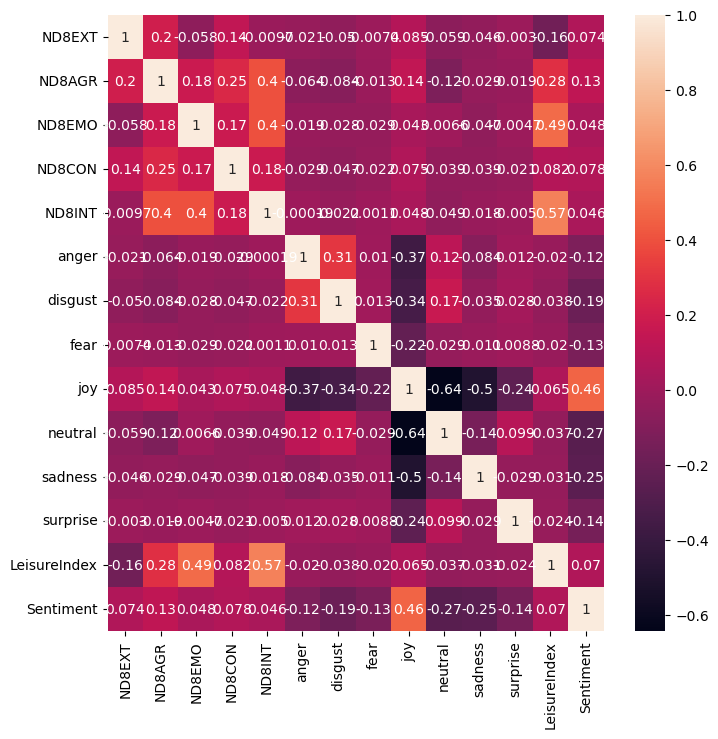

In [99]:
import matplotlib.pyplot as plt
import seaborn as sn

# Personality, emotions and free time
cols = ['ND8EXT', 'ND8AGR', 'ND8EMO', 'ND8CON', 'ND8INT',
        'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise', 
       'LeisureIndex', 'Sentiment']
pers_em_corr = updated_main[cols].corr()

# Visualize correlations between variables

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Create the heatmap using seaborn
sn.heatmap(pers_em_corr, ax=ax, annot=True)
plt.show()

#### Any interesting correlations between Leisure Index and personality/emotions?

Leisure Index (how much time a person spends on leisure activities relatively to other people) seems to be highly correlated particularly with certain personality traits:

1. intellect/openness to experience (0.57) - this makes sense because people who are high in openness to experience tend to be curious, openminded, imaginative, more willing to try new things - it would make sense that such people would have more hobbies and enjoy their free time more

2. emotional stability/neuroticism (0.47) - this also makes sense but we can't rule out that emotionally stable people can also more enjoy working

No interesting correlations between leisure index and emotions (emotion detection not perfect - in some cases falsely identified sadness).

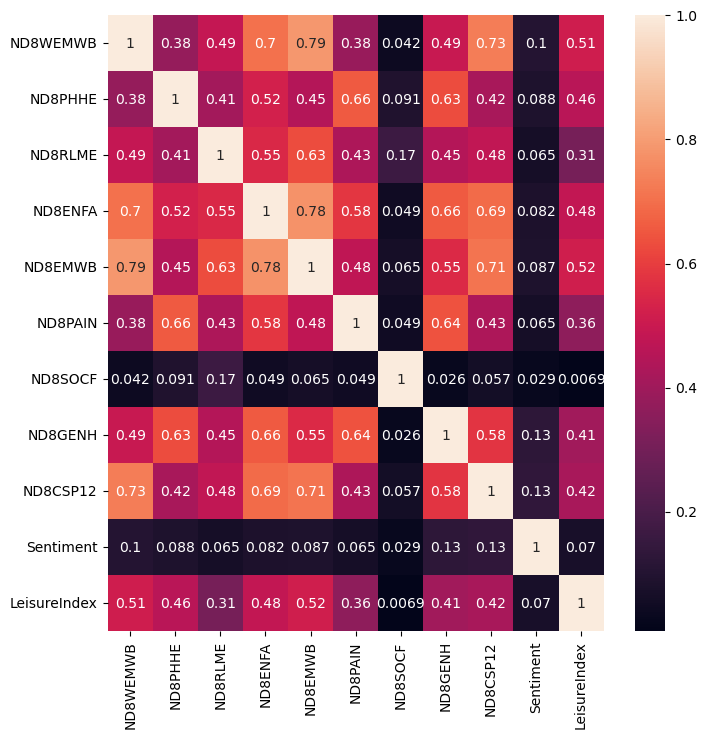

In [100]:
# Relationship between sentiment, emotions and wellbeing

col = ['ND8WEMWB','ND8PHHE','ND8RLME','ND8ENFA','ND8EMWB','ND8PAIN','ND8SOCF',
       'ND8GENH','ND8CSP12','Sentiment','LeisureIndex']

wellb_corr = updated_main[col].corr()

# Visualize correlations between variables

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Create the heatmap using seaborn
sn.heatmap(wellb_corr, ax=ax, annot=True)
plt.show()

#### Leisure Index and wellbeing

Most wellbeing variables seem to be correlated with the Leisure Index - people with higher wellbeing scores seem to spend more time on hobbiest (but the same could be true for work)

In [106]:
# Add columns with work variables
work = pd.read_csv('work.csv')
updated_main = pd.merge(updated_main, work, on='NCDSID')

MergeError: Passing 'suffixes' which cause duplicate columns {'N8SCQ16C_x', 'N8SCQ20C_x'} is not allowed.

In [107]:
work_drop=['N8SCQ16C_x', 'N8SCQ20C_x']
updated_main.drop(work_drop, axis=1, inplace=True)
updated_main.columns

Index(['NCDSID', 'Essay Text', 'Preprocessed Text', 'ND8EXT', 'ND8AGR',
       'ND8CON', 'ND8EMO', 'ND8INT', 'ND8WEMWB', 'ND8PHHE', 'ND8RLME',
       'ND8ENFA', 'ND8EMWB', 'ND8PAIN', 'ND8SOCF', 'ND8GENH', 'ND8CSP12',
       'N8SCQ1A', 'N8SCQ1B', 'N8SCQ1C', 'N8SCQ1D', 'N8SCQ1E', 'N8SCQ1F',
       'N8SCQ1G', 'N8SCQ1H', 'N8SCQ1I', 'N8SCQ1J', 'N8SCQ1K', 'N8SCQ1L',
       'LeisureIndex', 'Sentiment Continuous', 'anger', 'disgust', 'fear',
       'joy', 'neutral', 'sadness', 'surprise', 'Sentiment', 'N8SCQ16C',
       'N8SCQ20C'],
      dtype='object')

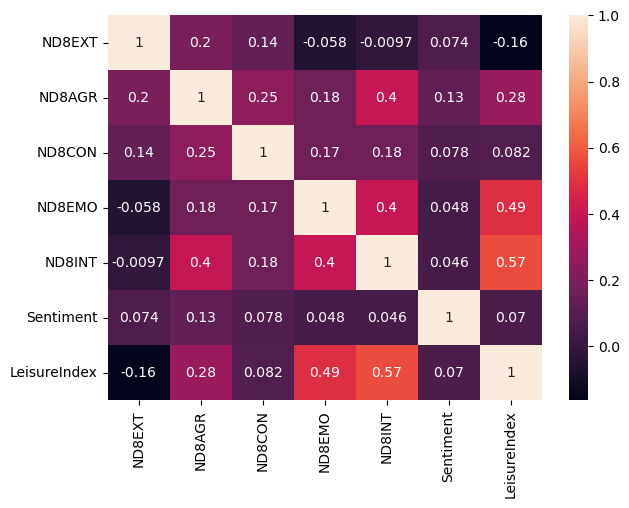

In [200]:
# Relationship between personality, leisure and sentiment

coll = ['ND8EXT', 'ND8AGR', 'ND8CON', 'ND8EMO', 'ND8INT','Sentiment','LeisureIndex']

b_corr = updated_main[coll].corr()

# Visualize correlations between variables

# Set the figure size
fig, ax = plt.subplots(figsize=(7, 5))

# Create the heatmap using seaborn
sn.heatmap(b_corr, ax=ax, annot=True)
plt.show()

In [119]:
# Try some regressions
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [150]:
# Set up and run the regression
X = updated_main[['ND8EXT', 'ND8AGR', 'ND8CON', 'ND8EMO', 'ND8INT',
                  'Sentiment','ND8WEMWB','ND8PHHE', 'ND8RLME','ND8ENFA', 
                  'ND8EMWB', 'ND8PAIN', 'ND8SOCF','ND8GENH', 'ND8CSP12',
                  'N8SCQ16C','N8SCQ20C','Sentiment Continuous', 'anger', 'disgust', 
                  'fear','joy', 'neutral', 'sadness', 'surprise']].values
Y = updated_main['LeisureIndex'].values
Y = Y.reshape(-1, 1)

# Impute missing values
# Create an instance of the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in your input data
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Fit the model
model0 = LinearRegression().fit(X_imputed, Y_imputed)
model0.coef_

array([[-1.48008793e-02,  1.71803393e-02, -1.17394486e-02,
         1.02212058e-02,  3.89499217e-02,  5.79558563e-03,
         4.95335695e-03,  6.77824715e-03, -9.19091306e-04,
         3.91797323e-03,  2.67236542e-03, -1.40357667e-03,
         8.00556293e-05,  8.24568631e-04,  7.01116226e-03,
        -2.55651258e-02,  3.56780952e-02,  2.23069800e-02,
         3.54634813e+04,  3.54634167e+04,  3.54634779e+04,
         3.54634588e+04,  3.54634465e+04,  3.54634735e+04,
         3.54634259e+04]])

In [156]:
# Try Lasso regression for feature selection (linear regression with regularizer)
from sklearn import linear_model

# Fit Lasso model and set the alpha parameter (the larger alpha the sparser model)
lasso0 = linear_model.Lasso(alpha=0.35).fit(X_imputed, Y_imputed)
lasso0.coef_
# extroversion, emotional stability, openness, physical and mental wellbeing, energy levels

array([-0.00263687,  0.        , -0.        ,  0.0011418 ,  0.03366502,
        0.        ,  0.        ,  0.00748677, -0.        ,  0.00312082,
        0.00892009,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ])

In [139]:
# Try out feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif, k=5).fit_transform(X_imputed, Y_imputed)
print(X_new)

[[26. 37. 58. 80. 88.]
 [23. 32. 40. 20. 28.]
 [30. 32. 59. 70. 88.]
 ...
 [35. 39. 56. 75. 92.]
 [35. 39. 56. 75. 92.]
 [35. 39. 56. 75. 92.]]


/Users/ninabucekova/miniconda3/envs/nlpenv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Most important predictors of Leisure Index (leisure engagement)

1. openness to experience
2. extroversion
2. emotional stability
3. mental wellbeing
4. energy levels

Literature (e. g. for meta-analysis: https://psycnet.apa.org/fulltext/2015-01003-001.pdf) supports the link between subjective well-being and leisure engagement, however, causality probably goes in the opposite direction (leisure engagement -> subjective wellbeing).

There is also some support for the link between openness to experience and leisure interest and engagement (high openness -> interest in a wider range of leisure activities, more times spent on leisure activities). Another study mentions also that lower neuroticism and higher Extraversion were moderately associated with stronger engagement in all types of activities (https://psycnet.apa.org/fulltext/2023-61649-001.pdf).

In [142]:
updated_main[['ND8EXT', 'ND8AGR', 'ND8CON', 'ND8EMO', 'ND8INT','ND8WEMWB', 
                 'ND8PHHE', 'ND8RLME','ND8ENFA', 'ND8EMWB', 'ND8PAIN', 'ND8SOCF',
                 'ND8GENH', 'ND8CSP12','N8SCQ16C','N8SCQ20C']].head()

,ND8EXT,ND8AGR,ND8CON,ND8EMO,ND8INT,ND8WEMWB,ND8PHHE,ND8RLME,ND8ENFA,ND8EMWB,ND8PAIN,ND8SOCF,ND8GENH,ND8CSP12,N8SCQ16C,N8SCQ20C
0,44.0,45.0,41.0,26.0,37.0,58.0,95.0,100.00,80.0,88.0,90.0,53.0,75.0,33.0,2.0,8.0
1,26.0,25.0,25.0,23.0,32.0,40.0,90.0,66.67,20.0,28.0,90.0,28.0,40.0,14.0,2.0,7.0
2,36.0,44.0,42.0,30.0,32.0,59.0,85.0,100.00,70.0,88.0,80.0,53.0,75.0,33.0,1.0,9.0
3,22.0,41.0,29.0,38.0,26.0,54.0,100.0,100.00,70.0,72.0,100.0,53.0,90.0,29.0,3.0,6.0
4,31.0,40.0,32.0,30.0,34.0,51.0,85.0,100.00,65.0,88.0,67.5,53.0,60.0,31.0,2.0,9.0


### Next Steps

#### Goal: A measure of leisure enjoyment

1. Leisure Index - simple mean of engagement with different leisure activities seems to be a relatively good proxy for leisure enjoyment. But - it only captures leisure engagement not accounting for any other individual charactersitics which may affect leisure enjoyment.


2. Composite measure as a weighted sum of the most important predictors of leisure engagement - we could incorporate other variables such as personality and wellbeing. Problem: how to choose variables and weights? 
   a. Based on theory and domain expertise - this will always be subjective,
       e. g. 1. Take Leisure Index + 4 most theoretically/empirically relevant predictors                   of leisure engagement
             2. Normalise them
             3. Leisure_Enjoyment_Index
             
   b. Use ML to learn the weights from data - we need objective function (this would have        to be circular)
         - learn optimal linear combination of 4 best predictors of Leisure Index and repea            the steps from a. using this weights   


3. Manually assign LeisureEnjoyment scores for X observations, fit a regression model/neural net and treat it as a supervised learning prediction task:
   i. Manually annotate first X observations
   ii. Fit a model
   iii. Use the model to predict the scores on the remaining (n - X) observations


4. Use personality variables as controls in the econometric models. According to some theories leisure activities and the degree of engagement in them is behavioural manifestation of personality. (controlling for wellbeing variables is also an option but the direction of causality is likely opposite)

In [160]:
# Look for words related to leisure in essay texts
import gensim
from gensim.models import Word2Vec
import gensim.downloader

# Load the pre-trained Word2Vec model
model = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [164]:
# Find similar words to a target word
leisure_similar = model.most_similar('hobbies')

# Print the most similar words and their similarity scores
for word, similarity in leisure_similar:
    print(word, similarity)

hobby 0.7486975789070129
hobbie 0.7297407388687134
Hobbies 0.7271853089332581
hobbys 0.6971437931060791
pastimes 0.6927661299705505
hobbiest 0.6826514005661011
pursuits 0.6788875460624695
avocations 0.6277733445167542
interests 0.6184866428375244
obsessions 0.6128895282745361


In [194]:
# Initialize custom model
model_custom = Word2Vec(updated_main['Preprocessed Text'], window=3,
                        min_count=5, workers=7)

In [195]:
model_custom.build_vocab(updated_main['Preprocessed Text'])

In [187]:
# Check if "leisure" is present in the vocabulary
if "hobbies" in model_custom.wv.key_to_index:
    
    # Word exists in the vocabulary
    similar_words = model_custom.wv.most_similar("leisure")
    print(similar_words)

else:
    # Word doesn't exist in the vocabulary
    print("Word not present in the vocabulary")

Word 'leisure' not present in the vocabulary


In [196]:
# Get the words in the vocabulary
words = list(model_custom.wv.key_to_index.keys())
print(words)

[' ', 'e', 'a', 't', 'i', 'o', 'n', 'l', 'r', 's', 'h', 'd', 'I', 'm', 'y', 'g', 'E', 'w', 'u', 'f', 'c', 'p', 'A', 'T', 'O', 'b', '.', 'N', 'L', 'v', 'R', 'S', 'H', 'k', 'M', ',', 'D', 'W', 'G', 'Y', 'U', 'C', 'F', 'P', 'B', '&', 'j', 'V', '-', 'K', "'", '0', 'x', '6', '!', ')', '(', 'J', '1', '2', '/', '{', '}', '5', 'q', '3', 'X', '4', '"', 'z', '?', ':', '+', 'Q', '8', '9', '7', ';', 'Z', '*', '@', '%', '’', '=', '[', ']', '…', '£', '–']


In [182]:
model_custom.train(updated_main['Preprocessed Text'].tolist(), 
                   total_examples=model_custom.corpus_count, epochs=10, report_delay=1)

(7508129, 41334580)

In [183]:
model_custom.wv.most_similar(positive=["leisure"])

KeyError: "Key 'leisure' not present in vocabulary"

In [165]:
import multiprocessing

In [166]:
cores = multiprocessing.cpu_count()
print(cores)

8
